In [23]:
#!/usr/bin/env python
import numpy as np
import sys
sys.path.insert(0,'/home/Salient-Object-Detection/WSS/caffe-cvpr17/python')
import caffe
import cv2

def initNet(root_path='../model',device_no=0):
    MODEL_FILE = root_path+'/deploy.prototxt'
    PRETRAINED = root_path+'/sal-finetune-3-0_iter_80000.caffemodel'
    if device_no>=0:
        caffe.set_device(device_no)
        caffe.set_mode_gpu()
    else:
        caffe.set_mode_cpu()
    net = caffe.Classifier(MODEL_FILE, PRETRAINED,caffe.TEST)
    return net

#process only one image, one can modify it to process a batch of images
def processImage(net,filename):
    transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
    transformer.set_transpose('data', (2,0,1))
    transformer.set_mean('data', np.array([ 103.939, 116.779, 123.68 ]))
    transformer.set_raw_scale('data', 255)  # images in [0,255] range instead of [0,1]
    transformer.set_channel_swap('data', (2,1,0))  # channels in BGR order instead of RGB

    img=caffe.io.load_image(filename)

    #process the image
    imgData=transformer.preprocess('data',img)
    net.blobs['data'].data[...] = imgData
    res = net.forward()

    _salmap = res['predict'][0]
    ### check if the enlarged 500x500 image looks okay 
    _salmap = np.transpose(_salmap,(1,2,0)) # change CxHxW back to WxHxC

    return _salmap[:,:,1], imgData

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline


net=initNet('../model',0)

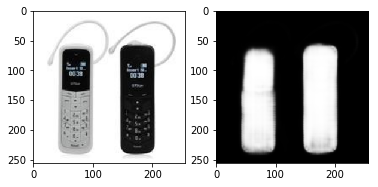

In [24]:
filename='../../DeepSaliency/images/2891646_0.png'
salmap, imgData=processImage(net,filename)

plt.subplot(1,2,1);plt.imshow(caffe.io.load_image(filename))
plt.subplot(1,2,2);plt.imshow(salmap,cmap='gray')

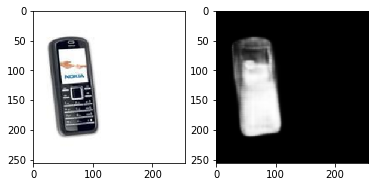

In [25]:
filename='../../DeepSaliency/images/1250942_0.png'
salmap, imgData=processImage(net,filename)

plt.subplot(1,2,1);plt.imshow(caffe.io.load_image(filename))
plt.subplot(1,2,2);plt.imshow(salmap,cmap='gray')

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


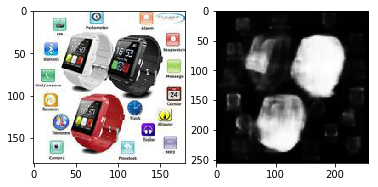

In [26]:
filename='../../DeepSaliency/images/1581274_1.jpg'
salmap, imgData=processImage(net,filename)

plt.subplot(1,2,1);plt.imshow(caffe.io.load_image(filename))
plt.subplot(1,2,2);plt.imshow(salmap,cmap='gray')

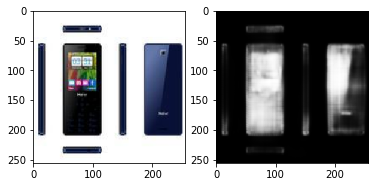

In [27]:
filename='../../DeepSaliency/images/2329286_1.png'
salmap, imgData=processImage(net,filename)

plt.subplot(1,2,1);plt.imshow(caffe.io.load_image(filename))
plt.subplot(1,2,2);plt.imshow(salmap,cmap='gray')

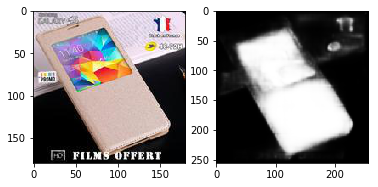

In [28]:
filename='../../DeepSaliency/images/88015_0.jpg'
salmap, imgData=processImage(net,filename)

plt.subplot(1,2,1);plt.imshow(caffe.io.load_image(filename))
plt.subplot(1,2,2);plt.imshow(salmap,cmap='gray')

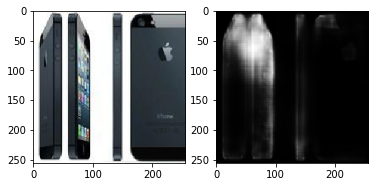

In [29]:
filename='../../DeepSaliency/images/2738078_3.png'
salmap, imgData=processImage(net,filename)

mapname='./images/output.png'
cv2.imwrite(mapname,salmap)

plt.subplot(1,2,1);plt.imshow(caffe.io.load_image(filename))
plt.subplot(1,2,2);plt.imshow(salmap,cmap='gray')